In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import optimize
from scipy import spatial
from sympy import *
from scipy.io import loadmat
import scipy.optimize as op
from sklearn.preprocessing import OneHotEncoder
from collections import namedtuple
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import itertools
import matplotlib.image as img
%matplotlib inline

# 1. K-means Clustering

## 1.1 K-means implemantations

In [89]:
def centDistance(x, y):
    return spatial.distance.euclidean(x, y)

def findClosestCentroids(X, centroids):
    c = []
    for x in X:
        minIndex = np.argmin(np.array([centDistance(x, centroid) for centroid in centroids]))
        c.append(minIndex)
    return c

In [90]:
def computeCentroids(X, c, K):
    c = np.array(c)
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        indexes = np.where(c == k)
        centroids[k, :] = (1/len(indexes[0])) * np.sum(X[indexes, :], axis=1)
        
    return centroids

In [91]:
def runKmeans(X, K, maxIters = 1000): # it's possible to implement with epsilon distance between old/new centroids
    centroids = X[np.random.randint((X.shape[0]), size=K), :]
    for it in range(maxIters):
        c = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, c, K)
    return np.array(c), centroids

In [92]:
data = loadmat('ex7data2.mat')  
X = data['X']  
c, centroids = runKmeans(X, 3)

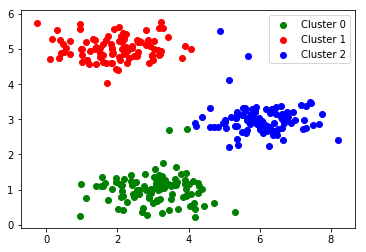

In [93]:
fig, ax = plt.subplots()

ax.scatter(X[np.where(c == 0), 0], X[np.where(c == 0), 1], color='g', label="Cluster 0")
ax.scatter(X[np.where(c == 1), 0], X[np.where(c == 1), 1], color='r', label="Cluster 1")
ax.scatter(X[np.where(c == 2), 0], X[np.where(c == 2), 1], color='b', label="Cluster 2")
ax.legend()
plt.show()

## 1.4 Image compression with K-Means

<class 'numpy.ndarray'>


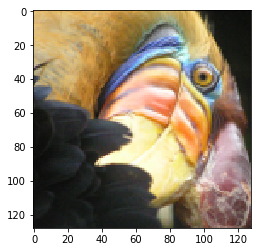

In [160]:
img_data = loadmat("bird_small.mat")['A']
print(type(img_data))
plt.imshow(img_data, interpolation='nearest')
plt.show()

### We do mean normalization

In [143]:
img_data = img_data / 255

### create X matrix for the runKmeans - each pixel will be row

In [171]:
X_img = img_data.reshape(img_data.shape[0] * img_data.shape[1], img_data.shape[2])
c, centroids = runKmeans(X=X_img, K=3, maxIters=10)

In [172]:
centroids = centroids * 255

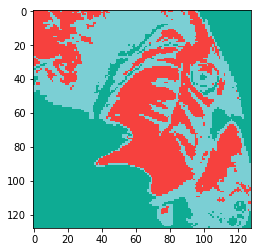

In [173]:
centroids = centroids.astype(np.uint8)
X_compressed = centroids[c, :]
img_compressed = X_compressed.reshape(img_data.shape[0], img_data.shape[1], img_data.shape[2])
plt.imshow(img_compressed, interpolation='nearest')
plt.show()

# 2. PCA - Principal Component Analysis

## 2.1 Example Dataset

In [533]:
data = loadmat("ex7data1.mat")

In [534]:
X = data['X']
df = pd.DataFrame(X, columns=['X1', 'X2'])

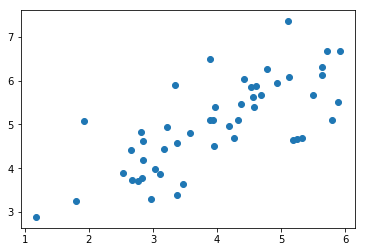

In [535]:
plt.scatter(df.X1, df.X2)
plt.show()

## 2.2 Implementing PCA

In [536]:
def pca(df):
    cov = df.cov()
    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [537]:
def projectData(X, U, k):
    X = np.matrix(X)
    Ureduce = U[:, :k]
    Z = np.dot(X, Ureduce)
    return Z

def recoverData(Z, U, k):
    Ureduce = U[:, :k]
    return Z*(Ureduce.T)

In [538]:
# normalize the matrix
df_norm = (df-df.mean())/df.std()

In [539]:
U, S, V = pca(df_norm)

In [540]:
Z = projectData(df_norm, U, 1)

In [541]:
df_recovered = pd.DataFrame(recoverData(Z, U, 1), columns=['X1', 'X2'])
df_recovered.shape

(50, 2)

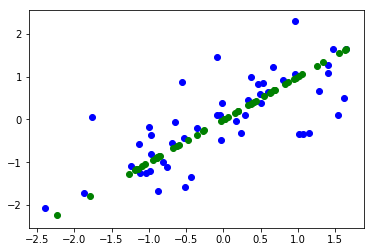

In [542]:
plt.scatter(df_norm.X1, df_norm.X2, c='b')
plt.scatter(df_recovered.X1, df_recovered.X2, c='g')
plt.show()

## 2.4 Face Image Dataset

In [543]:
X = loadmat("ex7faces.mat")['X']
X.shape

(5000, 1024)

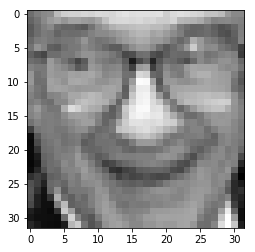

In [544]:
faces = X.ravel().reshape(X.shape[0], 32, 32)
plt.imshow(faces[0].T, cmap='gray')
plt.show()

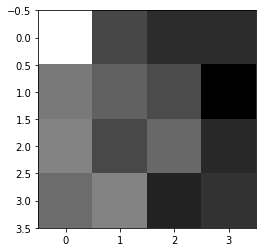

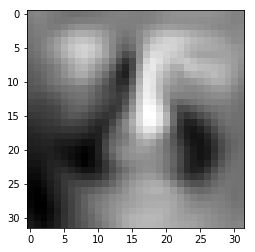

In [560]:
df = pd.DataFrame(X)
df_norm = (df-df.mean())/df.std()
U, S, V = pca(df_norm)
Z = np.matrix(projectData(X=df_norm, U=U, k=16))
df_recovered = np.matrix(pd.DataFrame(recoverData(Z, U, 16)))
face = Z[0, :].reshape(4, 4)
face_recovered = df_recovered[0, :].reshape(32, 32)
plt.imshow(face.T, cmap='gray')
plt.show()
plt.imshow(face_recovered.T, cmap='gray')
plt.show()